[View in Colaboratory](https://colab.research.google.com/github/kumarshankar/FADML-Project/blob/master/branches_anomalies.ipynb)

In [0]:

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving regular.txt to regular.txt


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "regular.txt" with length 6506664 bytes


In [0]:
dataset = pd.read_csv('regular.txt', engine='python', sep=',',names =['instructions','cache-references','cache-misses','branches','branch-misses'])

In [0]:
data_branches = dataset.iloc[:,[3]]

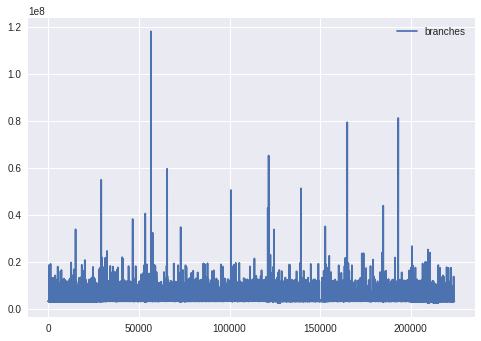

In [7]:
plt.plot(data_branches)
plt.legend(["branches"])
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
np.random.seed(7)

In [0]:
dataset = data_branches.values
dataset = dataset.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

150150 73955


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
dataset.shape

(224105, 1)

In [0]:
# reshape into X=t and Y=t+1
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
trainX.shape

(150099, 50)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
trainX.shape

(150099, 1, 50)

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1, batch_size=60, verbose=1)

Epoch 1/1
150099/150099 [==============================] - 6s 40us/step - loss: 3.5452e-05


In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [21]:
trainPredict

array([[0.00794448],
       [0.00790319],
       [0.00790488],
       ...,
       [0.0079504 ],
       [0.00793837],
       [0.00796443]], dtype=float32)

In [22]:
trainY

array([0.00831273, 0.00780882, 0.00870743, ..., 0.00849378, 0.00863091,
       0.00849245], dtype=float32)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [24]:
trainPredict,trainY

(array([[3183660.2],
        [3178884. ],
        [3179079.8],
        ...,
        [3184346. ],
        [3182954. ],
        [3185969. ]], dtype=float32),
 array([[3226261.95156855, 3167966.91388472, 3271922.97880838, ...,
         3247205.93971709, 3263069.99205896, 3247052.08715438]]))

In [25]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 681637.62 RMSE
Test Score: 672905.04 RMSE


In [26]:
from google.colab import files
upload = files.upload()

Saving ransomware.txt to ransomware.txt


In [27]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "regular.txt" with length 6506664 bytes


In [0]:
ransom_data = pd.read_csv('ransomware.txt', engine='python', sep=',',names =['instructions','cache-references','cache-misses','branches','branch-misses'])

In [0]:
ransom_data_branches = ransom_data.iloc[:,[3]]

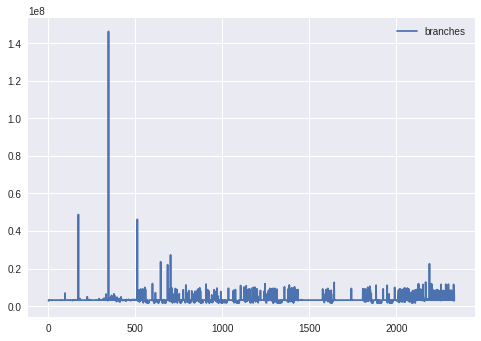

In [51]:
plt.plot(ransom_data_branches)
plt.legend(["branches"])
plt.show()

In [0]:
np.random.seed(7)
ransom_data_branches1 = ransom_data_branches.values
ransom_data_branches1 = ransom_data_branches.astype('float32')

In [0]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
ransom_data_branches2 = scaler1.fit_transform(ransom_data_branches1)

In [0]:
look_back = 50
X, Y = create_dataset(ransom_data_branches2, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
dataX = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [0]:
ransomPredict = model.predict(dataX)

In [57]:
Y[0]

0.010959217705785371

In [58]:
ransomPredict[0]

array([0.00861845], dtype=float32)

In [0]:
ransomPredict_unscaled = scaler1.inverse_transform(ransomPredict)

In [60]:
ransomPredict_unscaled[0]

array([2855028.], dtype=float32)

In [61]:
Y

array([0.01095922, 0.01137331, 0.01137632, ..., 0.00862824, 0.01130979,
       0.04700825])

In [0]:
Y1 = scaler1.inverse_transform([Y])

In [63]:
Y1[0][0]

3193558.0

In [0]:
ss = np.abs(Y1 - ransomPredict_unscaled)

In [65]:
ss[0][0]

338530.0

In [0]:
std = np.std(ransomPredict_unscaled)

In [67]:
std

242751.64

In [68]:
ransomPredict_unscaled.mean()

2990250.2

In [69]:
Y1.mean()

3864296.8178633978

In [0]:
UL = ransomPredict_unscaled.mean() + 3 * ransomPredict_unscaled.std()

In [71]:
ransomPredict_unscaled

array([[2855028. ],
       [2854519.2],
       [2857356.8],
       ...,
       [3520720. ],
       [3238962.2],
       [3407967.5]], dtype=float32)

In [72]:
ransomPredict_unscaled.mean()

2990250.2

In [73]:
Y1

array([[3193558., 3253445., 3253881., ..., 2856443., 3244259., 8407100.]])

In [0]:
anomalies = np.where(Y1>=UL)

In [75]:
anomalies[0].shape

(301,)

In [76]:
ransomPredict_unscaled.shape

(2284, 1)

In [77]:
Y1.shape

(1, 2284)

In [0]:
df = pd.DataFrame({'observed':np.array(Y1[0,:]),'predicted':np.array(ransomPredict_unscaled[:,0])})

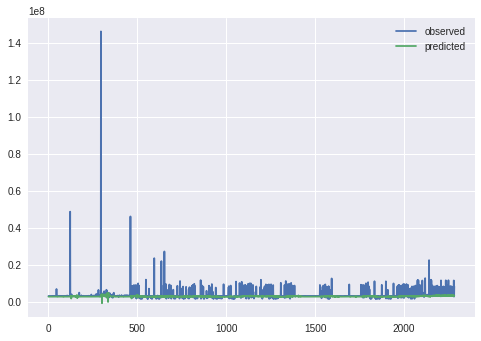

In [79]:
plt.plot(df)
plt.legend(['observed','predicted'])

In [0]:
##### 301  anomalies detected by running on branches